In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [4]:
dataframe=pd.read_csv('../notebook\data\StudentsPerformance.csv')

In [5]:
dataframe

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [6]:
dataframe.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
dataframe.duplicated().sum()

0

In [8]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
for i in dataframe.columns:
    print(i,"it has unique entites",dataframe[i].unique())

gender it has unique entites ['female' 'male']
race/ethnicity it has unique entites ['group B' 'group C' 'group A' 'group D' 'group E']
parental level of education it has unique entites ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch it has unique entites ['standard' 'free/reduced']
test preparation course it has unique entites ['none' 'completed']
math score it has unique entites [ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
reading score it has unique entites [ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86

In [ ]:
dataframe['total_score']= dataframe['math score']+dataframe['reading score']+dataframe['writing score']

In [11]:
dataframe

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282
996,male,group C,high school,free/reduced,none,62,55,55,172
997,female,group C,high school,free/reduced,completed,59,71,65,195
998,female,group D,some college,standard,completed,68,78,77,223


In [43]:
np.median(dataframe['total_score'])

205.0

In [12]:
# Graphs Distribution

In [25]:
female_count=dataframe['gender'].value_counts()[0]
male_count=dataframe['gender'].value_counts()[1]

In [29]:
df_counts=pd.DataFrame({
    'Gender':['Male','Female'],
    'Count':[male_count,female_count]
})

In [30]:
df_counts

,Gender,Count
0,Male,482
1,Female,518


In [26]:
import seaborn as sns

<Axes: xlabel='Count', ylabel='Gender'>

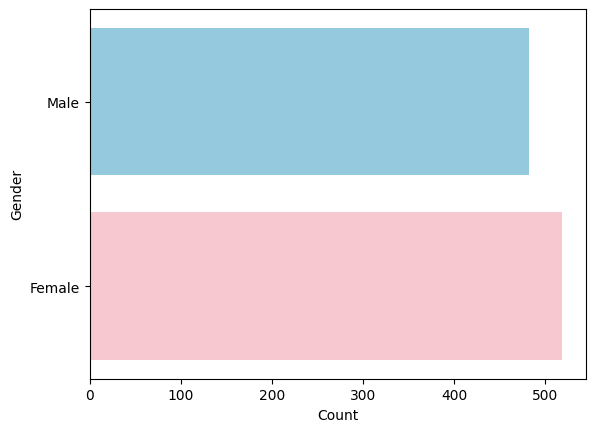

In [32]:
sns.barplot(x='Count',y='Gender',data=df_counts,palette=['skyblue','pink'])

In [39]:
max(dataframe['total_score'])
min(dataframe['total_score'])

27

<Axes: xlabel='total_score', ylabel='Count'>

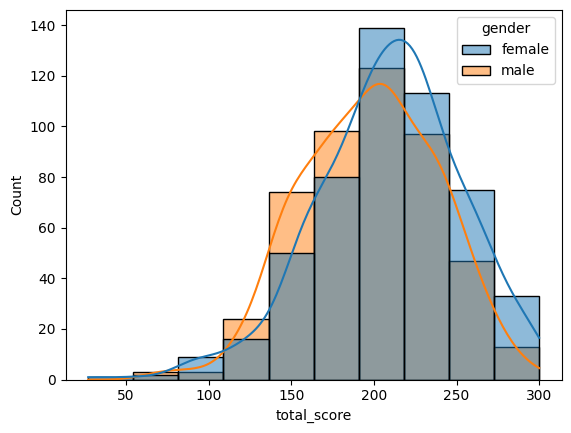

In [ ]:
sns.histplot(
    data=dataframe,
    x='total_score',  # these are the name of the column
    hue='gender', # this also are the name of the column
    bins=10,
    multiple='layer',
    kde=True
)

In [40]:
counts,bin_edge=np.histogram(dataframe['total_score'],bins=10)

In [42]:
bin_edge  #these are the bins size 

array([ 27. ,  54.3,  81.6, 108.9, 136.2, 163.5, 190.8, 218.1, 245.4,
       272.7, 300. ])